# Acesso ao Google Drive

O ambiente Google Colab proporciona uma máquina virtual rodando Linux (Ubuntu) com um disco rígido na nuvem, o qual pode ser visualizado clicando-se em `Files` no menu à esquerda. A pasta de trabalho padrão se chama `\content`. Para associar os arquivos e pastas do Google Drive clique no ícone `Mount Drive`. Isto irá criar uma pasta em `\content` de nome `drive` a qual conterá todas as pastas e arquivos presentes no seu Google Drive. Para trocar de pasta de trabalho importe o pacote `os` e troque a pasta de trabalho através do comando `os.chdir(caminho)`.

# Gráficos em Python

`matplotlib`: já tentei de tudo para não ter de usa-la. Aprendi a ler e escrever do Jupyter Notebook no Google Drive. Descobri o `rpy2` e consegui criar células R no meio de células Python. Tentei trocar de ambiente, passando a usar o RStudio. Tentei aprender `plotly`, `Bokeh` e outros pacotes que até esqueci o nome. Mas a verdade é uma só: gráficos em Python são feitos em `matplotlib`. Sendo assim vamos aprender a "domar" esta estranha criatura...

A primeira coisa a saber é que a `matplotlib` é um agregado composto de três partes. Uma estrutura básica de objetos e definições que pode ser importada tal como qualquer outro pacote em Python. Isto é executado na célula a seguir.

In [ ]:
import matplotlib as mpl

Além da estrutura de objetos existem duas bibliotecas de desenho dentro da `matplotlib`, a `pylab` e a `pyplot`. 

A `pylab` trabalha no estilo funcional, com os desenhos sendo executados por funções. Ela foi originalmente criada para permitir uma transição raṕida para o Python aos usuários do software Matlab. Este estilo de usar os recursos do ambiente é o mais conhecido dos usuários de Excel e R.

A `pyplot` trabalha dentro do conceito de orientação a objetos. Nele, primeiro instanciamos uma classe criando um ou mais objetos básicos. Os desenhos são executados através de métodos e propriedades destes objetos básicos. Seguindo a recomendação dos próprios desenvolvedores da `matplotlib` vamos utilizar a `pyplot`

Uma vez que a `matplotlib` foi carregada como `mpl`, a `pyplot` poderia ser utilizada como `mpl.pyplot`. No entanto a forma mais usual na comunidade de desenvolvedores Python é carrega-la em um alias distinto, geralmente denominado `plt` como pode ser visto a seguir:

In [ ]:
from matplotlib import pyplot as plt

Nosso objetivo agora é criar um gráfico em `matplotlib`. Neste exemplo vamos desenhar a função $y = sin(x)$ para o intervalo $[0, 2\pi]$ como uma linha. Os dados que irão gerar este gráfico são 1.000 pontos neste intervalo igualmente espaçados.

Para gerar os pares x e y que irão compor o gráfico vamos carregar a biblioteca `numpy`

In [ ]:
import numpy as np
import pandas as pd

x = np.linspace(0,2*np.pi,1000)
y = np.sin(x)

Para fins de apresentação os pares x e y são primeiro armazenados em um dicionário Python com chaves `'x'` e `'y'` (strings) e valores correspondentes aos numpy arrays `x` e `y`. O dicionário Python é então convertido para um dataframe Pandas, do qual são apresentadas as cinco primeiras linhas.

In [ ]:
import pandas as pd
dados = pd.DataFrame({'x':x, 'y':y})
dados.head()

,x,y
0,0.000000,0.000000
1,0.006289,0.006289
2,0.012579,0.012579
3,0.018868,0.018867
4,0.025158,0.025155


Para uma excelente introdução aos desenhos em `matplotlib` recomendo a página: https://realpython.com/python-matplotlib-guide/. Como pode-se perceber pela leitura da página, conhecer a estrutura de objetos em `matplotlib` é muito importante para que você seja capaz de entender o que deseja criar nos seus gráficos. Caso contrário, você ficará dependente do "copiar-colar" de sites como Stackoverflow.

Em `matplotlib` os gráficos são plotados em um objeto da classe `Figure`. Cada objeto `Figure` é composto de um ou vários objetos da classe `axes`. Cada objeto `axes` é composto de vários outros objetos, incluindo os objetos de desenho propriamente ditos. No caso deste gráfico o objeto de desenho que queremos é criado através do método `plot`. 

Para iniciar utilizamos a função `plt.subplots` para gerar uma tupla (grupo) com dois objetos. Um da classe `Figure` e outro da classe `Axes`. Observe no entando que o objeto da classe `Axes` está contido no objeto da classe `Figure`. A função `plt.subplots` gera os dois de forma a permitir o uso do objeto `Axes` sem que você tenha que identificar o objeto `Figure` associado. Observe a seguir:

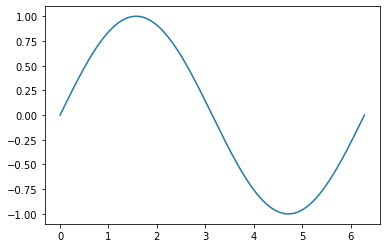

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, y);

No entanto, o mesmo gráfico poderia ser gerado utilizando o objeto `fig` o qual pertence a classe `Figure`. Este objeto tem um método `axes` que retorna uma lista com os vários objetos `axes` do objeto `Figure` associado. Neste caso temos apenas um gráfico. Sendo assim o gráfico em si é obtido pelo objeto `axes[0]`. O objeto `axes[0]` por sua vez tem o método `plot` que gera um gráfico de linha. Observe abaixo.

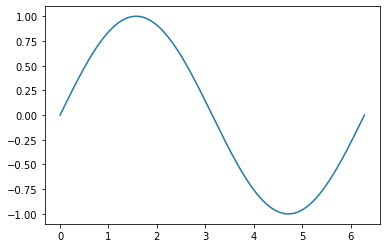

In [ ]:
fig, ax = plt.subplots()
fig.axes[0].plot(x, y);

Como foi dito acima, o método `plt.subplots()` gera como resultado uma tupla (grupo) com dois objetos. Podemos passar esta tupla para um único objeto de nome `fig`. O primeiro elemento desta tupla (`fig[0]`) é um objeto da classe `Figure` e o segundo (`fig[1]`) é da classe `axes`. Podemos então gerar o gráfico a partir de `fig[0]` como apresentado a seguir:

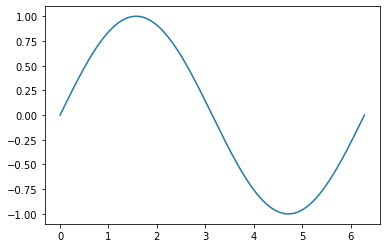

In [ ]:
fig = plt.subplots()
fig[0].axes[0].plot(x, y);

Ou então a partir do segundo elemento da tupla, neste caso `fig[1]`, o qual é um objeto da classe `axes`, possuindo ele próprio o método `.plot` conforme mostramos a seguir:

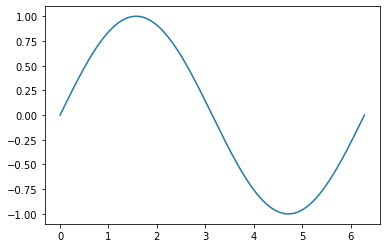

In [ ]:
fig = plt.subplots()
fig[1].plot(x,y);

A forma de receber os dois membros da tupla resultante de `plt.subplots()`, separando-os nos objetos de nome `fig` e `ax` é a mais usual na comunidade de desenvolvedores Python. Sendo assim, adotaremos a mesma a partir de agora.

No próximo exemplo vamos criar um gráfico de dispersão ao invés de linha. O método da classe `axes` que cria este tipo de gráfico é o `.scatter`. 

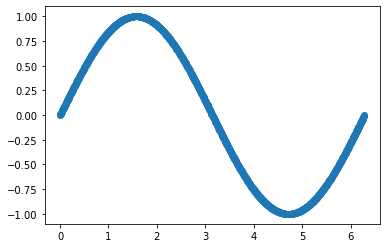

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x, y);

Suponha agora que desejamos dois gráficos do tipo dispersão no mesmo objeto `axes`. Cada vez que chamamos o método `axes.scatter` criamos um desenho. Se desejamos dois gráficos precisamos chamar o método duas vezes, uma para cada par de valores. No exemplo a seguir desenhamos os gráficos para $y_1 = sin(x)$ e $y_2 = cos(x)$ no mesmo objeto `axes`.

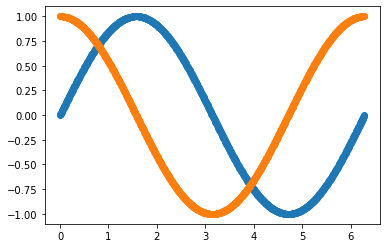

In [ ]:
x = np.linspace(0,2*np.pi,1000)
y1 = np.sin(x)
y2 = np.cos(x)
fig, ax = plt.subplots()
ax.scatter(x=x, y=y1)
ax.scatter(x=x, y=y2);

Podemos incluir quantos desenhos quisermos no mesmo objeto 'axes', bastando para isto chamar os métodos gráficos um por um. No exemplo a seguir criamos dois gráficos de dispersão (com o método `scatter`) e dois gráficos de linha (com o método `plot`). 

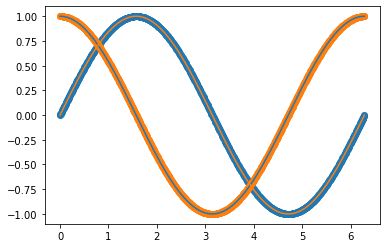

In [ ]:
x = np.linspace(0, 2*np.pi, 1000)
y1 = np.sin(x)
y2 = np.cos(x)
fig, ax = plt.subplots()
ax.scatter(x=x, y=y1)
ax.scatter(x=x, y=y2)
ax.plot(x,y2);
ax.plot(x,y1);

No exemplo abaixo dividimos o objeto `fig` (classe `Figure`) em dois gráficos. Cada gráfico é apresentado em uma coluna. Fazemos isso ao criar (instanciar) o objeto da classe `Figure` através do método `plt.subplots`. Para tal indicamos os valores dos parâmetros `nrow` e `ncol`. O default é `nrows=1` e `ncols=1`. Neste caso faremos `nrows=1` e `ncols=2`.

Observe o efeito na lista de objetos `axes` representada pelo objeto de nome `ax`. `ax` agora é uma lista com dois elementos `ax[0]` e `ax[1]`. `ax[0]` é o gráfico da esquerda. `ax[1]` é o gráfico da direita. 

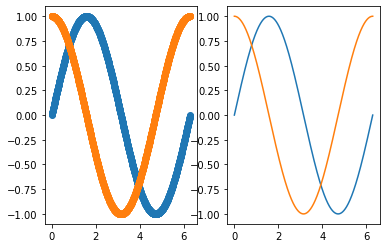

In [ ]:
x = np.linspace(0, 2*np.pi, 1000)
y1 = np.sin(x)
y2 = np.cos(x)

fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].scatter(x=x, y=y1)
ax[0].scatter(x=x, y=y2)
ax[1].plot(x,y1)
ax[1].plot(x,y2);

No gráfico anterior ocorreu a sobreposição dos números no eixo vertical (do gráfico à direita) com a área de desenho do gráfico à esquerda. Para que a `matplotlib` evite a sobreposição dos desenhos (dos `axes` em uma `Figure`), devemos utilizar a opção `plt.tight_layout`.

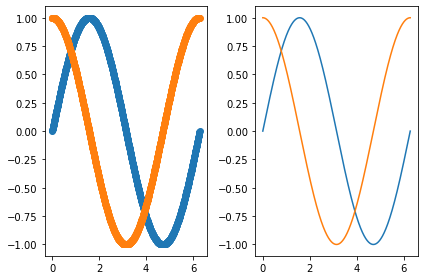

In [ ]:
x = np.linspace(0, 2*np.pi, 1000)
y1 = np.sin(x)
y2 = np.cos(x)

fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].scatter(x=x, y=y1)
ax[0].scatter(x=x, y=y2)
ax[1].plot(x,y1)
ax[1].plot(x,y2)
plt.tight_layout();

Vamos inserir títulos nos objetos de desenho (os objetos `axes`). A procura de ajuda no Google neste caso é essencial. A chave que podemos utilizar é: 'matplotlib axes title'. Logo descobrimos que o método procurado chama-se `set_title`.

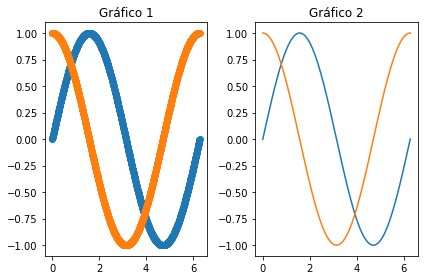

In [ ]:
x = np.linspace(0, 2*np.pi, 1000)
y1 = np.sin(x)
y2 = np.cos(x)

fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].scatter(x=x, y=y1)
ax[0].scatter(x=x, y=y2)
ax[0].set_title("Gráfico 1")
ax[1].plot(x,y1)
ax[1].plot(x,y2)
ax[1].set_title("Gráfico 2")
plt.tight_layout();

Antes de aprendermos a trocar o estilo dos gráficos (meu preferido é o estilo `ggplot`, inspirado na biblioteca R de mesmo nome), precisamos conhecer um detalhe a respeito da escolha dos parâmetros default na `matplotlib`. 

Quando a biblioteca `matplotlib` é carregada, são definidos os valores default de um conjunto de parâmetros para desenho dos gráficos. Na célula a seguir salvamos este conjunto em um dicionário Python de nome `rcParamsInicial`.

In [ ]:
rcParamsInicial = dict(mpl.rcParams)

A princípio este conjunto de parâmetros de desenho deveria ser o mesmo do estilo `default`. Os parâmetros que definem o este estilo podem ser obtidos através do dicionário `mpl.rcParamsDefault`.

No entanto, como pode ser visto na célula a seguir eles diferem em seis parâmetros. Isto torna o formato inicial dos gráficos um pouco diferente do formato `default`. O usuário percebe isso ao trocar o estilo padrão da `matplotlib` através da função `plt.style.use`. Uma vez trocada, a formatação inicial só será recuperada se o dicionário tiver sido salvo.

In [ ]:
import pandas as pd

def checa_params(dicionario1, nome1, dicionario2, nome2):
  df = pd.DataFrame(columns=["chave", nome1, nome2])
  for chave in dicionario1.keys():
    if dicionario1[chave] != dicionario2[chave]:
      df = df.append(pd.DataFrame({"chave":[chave], 
                                   nome1:[dicionario1[chave]], 
                                   nome2:[dicionario2[chave]]}), ignore_index=True)
  return(df)

checa_params(rcParamsInicial, "rcParamsInicial", mpl.rcParamsDefault, "rcParamsDefault")

,chave,rcParamsInicial,rcParamsDefault
0,figure.dpi,72,100
1,figure.edgecolor,"(1, 1, 1, 0)",white
2,figure.facecolor,"(1, 1, 1, 0)",white
3,figure.figsize,"[6.0, 4.0]","[6.4, 4.8]"
4,figure.subplot.bottom,0.125,0.11
5,interactive,True,False


Vamos agora observar o efeito de trocar o estilo padrão inicial e depois tentar retornar para o estilo `default`. Para os exemplos a seguir vamos utilizar o dataset `mpg` o qual pode ser baixado diretamente da internet. As primeiras linhas do dataset podem ser vistas na célula abaixo.

In [ ]:
import pandas as pd
mpg = pd.read_csv("https://raw.githubusercontent.com/tidyverse/ggplot2/master/data-raw/mpg.csv")
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


Observe os gráficos a seguir. Primeiro vamos desenhar um gráfico de dispersão para as variáveis `displ` e `hwy` do dataset `mpg`. Uma vez que ainda não alteramos o estilo padrão da Matplotlib, os parâmetros utilizados são aqueles que foram salvos no dicionário Python de nome `rcParamsInicial`.

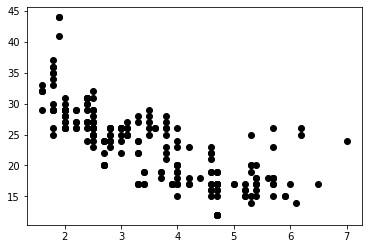

In [ ]:
fig, ax = plt.subplots()
ax.scatter(mpg['displ'], mpg['hwy'], color = 'black');

Agora vamos trocar o estilo para o `ggplot` e refazer o gráfico.

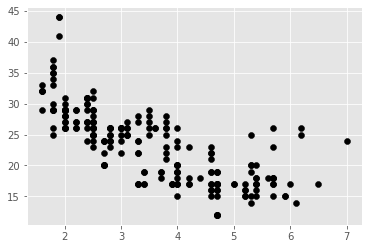

In [ ]:
plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.scatter(mpg['displ'], mpg['hwy'], color = 'black');

Se retornamos ao estilo `default` e refazemos o gráfico obtemos como resultado o gráfico a seguir:

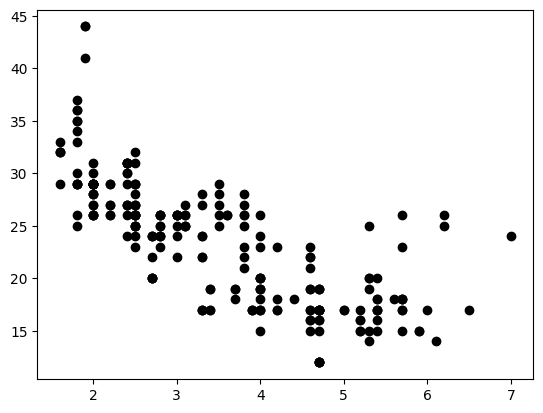

In [ ]:
plt.style.use('default')
fig, ax = plt.subplots()
ax.scatter(mpg['displ'], mpg['hwy'], color='black');

Se tentamos agora refazer o gráfico no estilo `ggplot` obteremos como resultado:

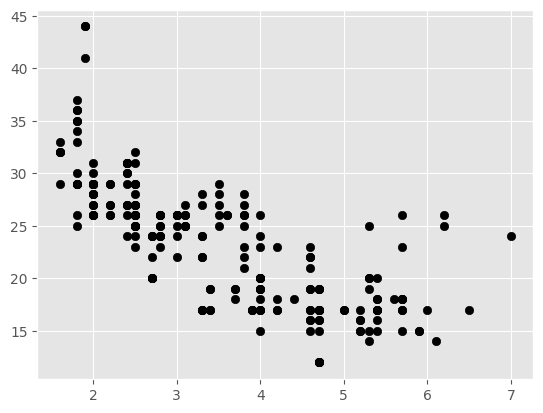

In [ ]:
plt.style.use("ggplot")
fig, ax = plt.subplots()
ax.scatter(mpg['displ'], mpg['hwy'], color = 'black');

Para retornar ao estilo inicial temos de atualizar diretamente o dicionário `rcParams` através da função `mpl.rcParams.update(dicionario)`. Esta atualização gera alguns avisos de depreciação mas faz o update do dicionário em uso corretamente.

In [ ]:
mpl.rcParams.update(rcParamsInicial)

/usr/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The datapath rcparam was deprecated in Matplotlib 3.2.1 and will be removed two minor releases later.
  self[key] = other[key]
/usr/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/usr/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/usr/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/usr/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]


Ao criarmos novamente o gráfico anterior percebemos que os parâmetros voltaram aos seus valores inciais.

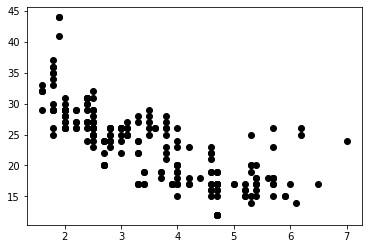

In [ ]:
fig, ax = plt.subplots()
ax.scatter(mpg['displ'], mpg['hwy'], color = 'black');

Percebemos o mesmo ao usar o estilo `ggplot`

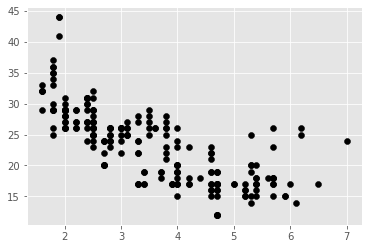

In [ ]:
plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.scatter(x=mpg['displ'], y=mpg['hwy'], color='black');

Para efeito de comparação geramos o último gráfico com dois objetos `axes` lado a lado, porém agora com o estilo padrão `ggplot`.

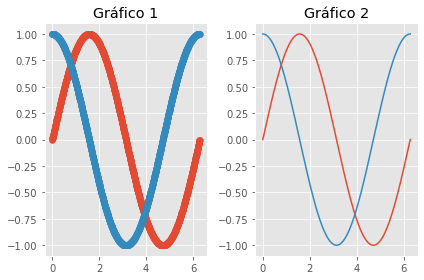

In [ ]:
x = np.linspace(0, 2*np.pi, 1000)
y1 = np.sin(x)
y2 = np.cos(x)

fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].scatter(x=x, y=y1)
ax[0].scatter(x=x, y=y2)
ax[0].set_title("Gráfico 1")
ax[1].plot(x,y1)
ax[1].plot(x,y2)
ax[1].set_title("Gráfico 2")
plt.tight_layout();

A seguir são criadas duas funções com o recurso `lambda` do Python e em seguida é gerada uma lista a partir do mapeamento destas funções com o recurso `map`. 

In [ ]:
relu = lambda z: max(0,z)
sig = lambda z: 1/(1+np.exp(-z))

z = np.linspace(-3,3,100)
a1 = list(map(relu,z))
a2 = list(map(sig,z))
df = pd.DataFrame({"z":z, "relu":a1, "sig":a2})
df.head(3)

,z,relu,sig
0,-3.000000,0.0,0.047426
1,-2.939394,0.0,0.050240
2,-2.878788,0.0,0.053212


As funções são desenhadas em um mesmo objeto `axes` e em seguida é limitado o valor máximo do eixo dos y.

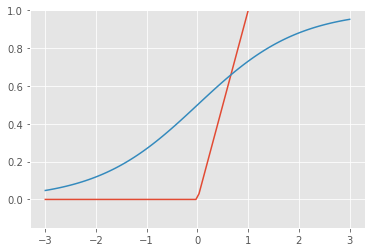

In [ ]:
fig, ax = plt.subplots()
ax.plot(df['z'],df['relu'])
ax.plot(df['z'],df['sig'])
ax.axis(ymax = 1);

No próximo exemplo são criados três variáveis, `x1`, `x2` e `y` e seus valores armazenados em um data frame pandas. 

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples=1000, centers=[[0.5,0.5],[2.5,2.5]], n_features=2,
                  random_state = 1)

import pandas as pd
dados = pd.DataFrame(data = np.column_stack((X,Y)),
                     columns = ["x1","x2","y"])
dados.head(3)

,x1,x2,y
0,0.224154,1.728956,0.0
1,0.664665,1.278174,0.0
2,3.014412,2.482749,1.0


As variáveis são agora desenhadas em um mesmo objeto `axes` através de duas chamadas ao método `.scatter`. A cada vez que executamos a chamada ao método `.scatter` é passado um conjunto de dados com um valor específico de variável `y`. Para cada valor da variável `y` é escolhida uma cor de desenho. 

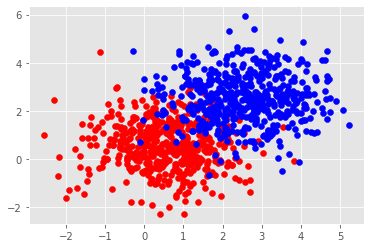

In [ ]:
from matplotlib import pyplot as plt 
plt.style.use('ggplot')
fig, ax = plt.subplots()

dados_red = dados[dados['y']==0]
ax.scatter(x=dados_red['x1'], y=dados_red['x2'], color='red');

dados_blue = dados[dados['y']==1]
ax.scatter(x=dados_blue['x1'], y=dados_blue['x2'], color='blue');

Neste caso o mesmo efeito é obtido através de uma única chamada ao método `scatter`. Neste caso a cor é gerada ponto a ponto e os valores passados como uma lista ao parâmetro `color` do método `scatter`.

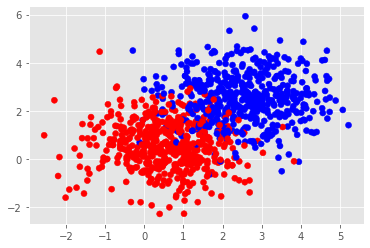

In [ ]:
from matplotlib import pyplot as plt 
plt.style.use('ggplot')
fig, ax = plt.subplots()

cores = dict({0:'red', 1:'blue'})
ax.scatter(x=dados['x1'], y=dados['x2'], color=[cores[i] for i in dados['y']]);

# Dataframes com Pandas

In [ ]:
dados = pd.DataFrame({"valor":[1,2,3,4,5],
              "cor":["azul","preto","preto","azul","azul"]})

In [ ]:
dados

,valor,cor
0,1,azul
1,2,preto
2,3,preto
3,4,azul
4,5,azul


In [ ]:
dados['valor'].mean(), dados['valor'].std()

(3.0, 1.5811388300841898)

Nesta filtragem do data frame, `1:4` não deve ser entendido como o número da linha e sim o nome do índice de linha. O método `.loc` faz a procura por nome de índice. 

In [ ]:
dados.loc[1:4,['cor','valor']]

,cor,valor
1,preto,2
2,preto,3
3,azul,4
4,azul,5


Caso o índice seja alterado para uma sequência de strings, a operação executada na célula acima vai falhar.

In [ ]:
dados['nova_coluna']=['nome'+str(i+1) for i in range(5)]
dados.head()

,valor,cor,nova_coluna
0,1,azul,nome1
1,2,preto,nome2
2,3,preto,nome3
3,4,azul,nome4
4,5,azul,nome5


In [ ]:
dados.set_index('nova_coluna', drop=True, inplace=True)
dados

,valor,cor
nova_coluna,,
nome1,1,azul
nome2,2,preto
nome3,3,preto
nome4,4,azul
nome5,5,azul


In [ ]:
try:
  dados.loc[1:4,['valor','cor']]
except:
  print('Deu erro')

Deu erro


Observe que os índices, apesar de serem constituidos de strings apresentam o caráter posicional, podendo serem utilizados para filtragem de um valor até o outro.

In [ ]:
dados.loc['nome1':'nome4',['valor','cor']]

,valor,cor
nova_coluna,,
nome1,1,azul
nome2,2,preto
nome3,3,preto
nome4,4,azul


Já o método `.iloc` faz a procura pelos números de linha e coluna, independente do índice utilizado.

In [ ]:
dados.iloc[1:4,0:2]

,valor,cor
nova_coluna,,
nome2,2,preto
nome3,3,preto
nome4,4,azul


In [ ]:
dados[[True,False,True,False,True]]

,valor,cor
nova_coluna,,
nome1,1,azul
nome3,3,preto
nome5,5,azul


In [ ]:
dados[dados['valor']<4]

,valor,cor
nova_coluna,,
nome1,1,azul
nome2,2,preto
nome3,3,preto


In [ ]:
dados[dados['valor']<4].loc[dados['cor']=='preto']

,valor,cor
nova_coluna,,
nome2,2,preto
nome3,3,preto


In [ ]:
dados[dados['valor']<4].loc[dados['cor']=='preto'].loc[dados['valor']==2]

,valor,cor
nova_coluna,,
nome2,2,preto


In [ ]:
dados['dobro'] = dados['valor']*2
dados

,valor,cor,dobro
nova_coluna,,,
nome1,1,azul,2
nome2,2,preto,4
nome3,3,preto,6
nome4,4,azul,8
nome5,5,azul,10


In [ ]:
dados2 = dados.groupby(by='cor')
dados2

In [ ]:
dados2.sum()

,valor,dobro
cor,,
azul,10,20
preto,5,10


In [ ]:
import pandas as pd
x = pd.DataFrame({'nome':['John','Paul','Ringo','Harrison','Peter'],
  'instrumento':['baixo','guitarra','bateria','guitarra','teclado']})

y = pd.DataFrame({'nome':['John','Paul','Ringo','Harrison','Stuart','Davies'],
                  'banda':[True,True,True,True,False,False]})


In [ ]:
pd.merge(x,y,how='inner',on='nome').head()

,nome,instrumento,banda
0,John,baixo,True
1,Paul,guitarra,True
2,Ringo,bateria,True
3,Harrison,guitarra,True


# Numpy

**QCE, Exercício 1.0** Prove que as matrizes K apresentadas abaixo são simétricas para $K_1$, $K_2$, $K_3$ e $K_4$

In [ ]:
import numpy as np

In [ ]:
K1 = np.array([[2]])
K2 = np.array([[2,-1],[-1,2]])
K3 = np.array([[2,-1,0],[-1,2,-1],[0,-1,2]])
K4 = np.array([[2,-1,0,0],[-1,2,-1,0],[0,-1,2,-1],[0,0,-1,2]])
K4

array([[ 2, -1,  0,  0],
       [-1,  2, -1,  0],
       [ 0, -1,  2, -1],
       [ 0,  0, -1,  2]])

In [ ]:
np.sum(K1 != K1.T), np.sum(K2 != K2.T), np.sum(K3 != K3.T), np.sum(K4 != K4.T)

(0, 0, 0, 0)

In [ ]:
T3_inv = np.array([[3,2,2],[2,2,1],[1,1,1]])
T3_inv

array([[3, 2, 2],
       [2, 2, 1],
       [1, 1, 1]])

In [ ]:
np.linalg.inv(T3_inv)

array([[ 1.,  0., -2.],
       [-1.,  1.,  1.],
       [ 0., -1.,  2.]])

**QCE, Exercício 1.1** Calcule via numpy $\sqrt{-1}$, $i^3$ e $i^{15}$

In [ ]:
import numpy as np
np.sqrt(-1+0j), (1j)**3, (1j)**15

(1j, (-0-1j), (-0-1j))

**QCE, Exercício 1.2** Dado $c=3+4j$ apresente a parte real, imaginária, o conjugado, módulo e ângulo do mesmo.



In [ ]:
import numpy as np
c = 3+4j
c.real, c.imag, c.conjugate(), np.abs(c), np.angle(c)

(3.0, 4.0, (3-4j), 5.0, 0.9272952180016122)

**QCE, Exercício 1.3** Encontre as raizes cúbicas de $c=(1+j)$

In [ ]:
import numpy as np
coef = [1,0,0,-(1+1j)]
np.roots(coef)

array([-0.79370053+0.79370053j, -0.29051456-1.08421508j,
        1.08421508+0.29051456j])

**McMahon, Exemplo 3.10** Calcule os autovalores e o traço da matrix X

In [ ]:
import numpy as np
X = np.array([[0,1],[1,0]])
X

array([[0, 1],
       [1, 0]])

In [ ]:
np.linalg.eig(X)[0]

array([ 1., -1.])

In [ ]:
X.trace()

0

In [ ]:
X = np.array([[1,0,2],[0,3,4],[1,0,2]])
X

array([[1, 0, 2],
       [0, 3, 4],
       [1, 0, 2]])

In [ ]:
np.linalg.eig(X)[0]

array([3., 0., 3.])

In [ ]:
X.trace()

6